### 1. Prepare input and target data for model

In [3]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# load the dataset
def load_dataset(filename, column):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename)
	# split into input (X) and output (y) variables & convert to numPy array
	X = data.drop(column, axis = 1).values
	y = data[column].values
	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# load the dataset
X, y = load_dataset('mushrooms.csv', 'class')
# split into train and test sets; 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

### 2. Perform Feature Selection on Data

Feature 0: 14.100028
Feature 1: 183.929983
Feature 2: 13.830041
Feature 3: 939.892874
Feature 4: 73.768324
Feature 5: 2.471340
Feature 6: 701.359713
Feature 7: 1282.950367
Feature 8: 4747.903973
Feature 9: 30.456485
Feature 10: 909.203203
Feature 11: 179.667702
Feature 12: 161.587612
Feature 13: 98.871111
Feature 14: 92.051434
Feature 15: nan
Feature 16: 3.751978
Feature 17: 22.045196
Feature 18: 1549.187451
Feature 19: 288.027937
Feature 20: 249.676829
Feature 21: 636.580987


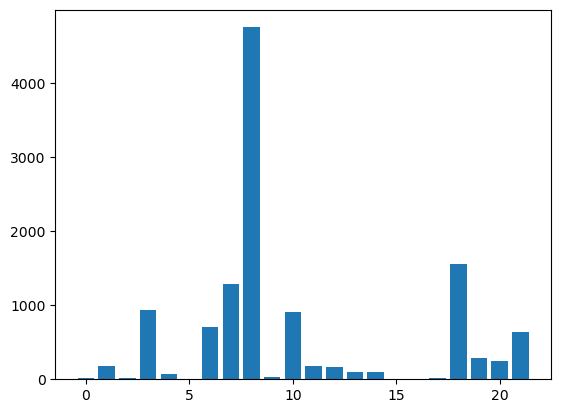

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
 fs = SelectKBest(score_func=chi2, k='all')
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()